## Shakespeare Text Analysis

### Genre-wise categorization of publications

In [5]:
category= '''COMEDIES
ALLS WELL THAT ENDS WELL
AS YOU LIKE IT
THE COMEDY OF ERRORS
LOVE'S LABOUR'S LOST
MEASURE FOR MEASURE
THE MERCHANT OF VENICE
THE MERRY WIVES OF WINDSOR
A MIDSUMMER NIGHT'S DREAM
MUCH ADO ABOUT NOTHING
THE TAMING OF THE SHREW
THE TEMPEST
TWELFTH NIGHT; OR, WHAT YOU WILL
THE TWO GENTLEMEN OF VERONA
THE WINTER'S TALE
HISTORIES
THE FIRST PART OF KING HENRY THE FOURTH
SECOND PART OF KING HENRY IV
THE LIFE OF KING HENRY THE FIFTH
THE FIRST PART OF HENRY THE SIXTH
THE SECOND PART OF KING HENRY THE SIXTH
THE THIRD PART OF KING HENRY THE SIXTH
KING HENRY THE EIGHTH
KING JOHN
Pericles
KING RICHARD THE SECOND
KING RICHARD III
POEMS
A LOVER'S COMPLAINT
Passionate Pilgrim
Phoenix and the Turtle
Rape of Lucrece
Venus and Adonis
THE SONNETS
TRAGEDIES
THE TRAGEDY OF ANTONY AND CLEOPATRA
THE TRAGEDY OF CORIOLANUS
CYMBELINE
THE TRAGEDY OF HAMLET, PRINCE OF DENMARK
THE TRAGEDY OF JULIUS CAESAR
THE TRAGEDY OF KING LEAR
THE TRAGEDY OF MACBETH
THE TRAGEDY OF OTHELLO, MOOR OF VENICE
THE TRAGEDY OF ROMEO AND JULIET
THE LIFE OF TIMON OF ATHENS
THE TRAGEDY OF TITUS ANDRONICUS
THE HISTORY OF TROILUS AND CRESSIDA'''  

genre_categorization = dict()
temp = ''

for word in category.split('\n'):
    if word.upper() in ('COMEDIES','HISTORIES','TRAGEDIES','POEMS'):
        temp = word
    else:
        word = ''.join([a for a in word if a==' ' or a.isalpha()])
        genre_categorization[word]=temp
        
genre_categorization

{'ALLS WELL THAT ENDS WELL': 'COMEDIES',
 'AS YOU LIKE IT': 'COMEDIES',
 'THE COMEDY OF ERRORS': 'COMEDIES',
 'LOVES LABOURS LOST': 'COMEDIES',
 'MEASURE FOR MEASURE': 'COMEDIES',
 'THE MERCHANT OF VENICE': 'COMEDIES',
 'THE MERRY WIVES OF WINDSOR': 'COMEDIES',
 'A MIDSUMMER NIGHTS DREAM': 'COMEDIES',
 'MUCH ADO ABOUT NOTHING': 'COMEDIES',
 'THE TAMING OF THE SHREW': 'COMEDIES',
 'THE TEMPEST': 'COMEDIES',
 'TWELFTH NIGHT OR WHAT YOU WILL': 'COMEDIES',
 'THE TWO GENTLEMEN OF VERONA': 'COMEDIES',
 'THE WINTERS TALE': 'COMEDIES',
 'THE FIRST PART OF KING HENRY THE FOURTH': 'HISTORIES',
 'SECOND PART OF KING HENRY IV': 'HISTORIES',
 'THE LIFE OF KING HENRY THE FIFTH': 'HISTORIES',
 'THE FIRST PART OF HENRY THE SIXTH': 'HISTORIES',
 'THE SECOND PART OF KING HENRY THE SIXTH': 'HISTORIES',
 'THE THIRD PART OF KING HENRY THE SIXTH': 'HISTORIES',
 'KING HENRY THE EIGHTH': 'HISTORIES',
 'KING JOHN': 'HISTORIES',
 'Pericles': 'HISTORIES',
 'KING RICHARD THE SECOND': 'HISTORIES',
 'KING RICHARD I

### Data Pre-processing

In [6]:
string_split_part1 = """<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM
SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS
PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE
WITH PERMISSION.  ELECTRONIC AND MACHINE READABLE COPIES MAY BE
DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS
PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED
COMMERCIALLY.  PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY
SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>"""

string_split_part2 = """<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM         
SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS  
PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE
WITH PERMISSION.  ELECTRONIC AND MACHINE READABLE COPIES MAY BE    
DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS      
PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED             
COMMERCIALLY.  PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY  
SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>"""

string_split_author_name = "by William Shakespeare"

In [7]:
import re
import pandas as pd

def split_string(delimiters, string, maxsplit=0):
    regexPattern = '|'.join(map(re.escape, delimiters))
    return re.split(regexPattern, string, maxsplit)

text_file = open("t8.shakespeare.txt", "r")
data = text_file.read()
text_file.close()

delimiters = string_split_author_name
all_publications = data.split(string_split_author_name)
print("Total number of publications: ", len(all_publications))

Total number of publications:  39


In [8]:
string_delimiters = string_split_part1, string_split_part2
publication = [] 
publication_year = []
add_data = None
add_index_data = None

for index, pub in enumerate(all_publications):
    split_data = split_string(string_delimiters, pub)
    next_publication_year = split_data[-1].strip()
    
    if next_publication_year != 'End of this Etext of The Complete Works of William Shakespeare':
        if len(next_publication_year) > 100:
            actual_year_pub_data = next_publication_year.split("THE END")
            publication_year.append(actual_year_pub_data[-1])
            add_index_data = index + 1
            add_data = actual_year_pub_data[-2]
        else:
             publication_year.append(next_publication_year)
        
    if index == 0:
        continue
        
    else:
        previous_publication = split_data[-2]
        publication.append(previous_publication)

publication[add_index_data] = publication[add_index_data] + add_data

final_data = []

for index, publication_year_data in enumerate(publication_year):
    publication_year_data_cleaned = (list(filter(lambda x: x != '', publication_year_data.split("\n"))))
    print(publication_year_data_cleaned)
    final_data.append({'year' : publication_year_data_cleaned[0], 'publication' : publication_year_data_cleaned[1], 'text' : publication[index]})

['1609', 'THE SONNETS']
['1603', 'ALLS WELL THAT ENDS WELL']
['1607', 'THE TRAGEDY OF ANTONY AND CLEOPATRA']
['1601', 'AS YOU LIKE IT']
['1593', 'THE COMEDY OF ERRORS']
['1608', 'THE TRAGEDY OF CORIOLANUS']
['1609', 'CYMBELINE']
['1604', 'THE TRAGEDY OF HAMLET, PRINCE OF DENMARK']
['1598', 'THE FIRST PART OF KING HENRY THE FOURTH']
['1598', 'SECOND PART OF KING HENRY IV']
['1599', 'THE LIFE OF KING HENRY THE FIFTH']
['1592', 'THE FIRST PART OF HENRY THE SIXTH']
['1591', 'THE SECOND PART OF KING HENRY THE SIXTH']
['1591', 'THE THIRD PART OF KING HENRY THE SIXTH']
['1611', 'KING HENRY THE EIGHTH']
['1597', 'KING JOHN']
['1599', 'THE TRAGEDY OF JULIUS CAESAR']
['1606', 'THE TRAGEDY OF KING LEAR']
['1595', "LOVE'S LABOUR'S LOST"]
['1606', 'THE TRAGEDY OF MACBETH']
['1605', 'MEASURE FOR MEASURE']
['1597', 'THE MERCHANT OF VENICE']
['1601', 'THE MERRY WIVES OF WINDSOR']
['1596', "A MIDSUMMER NIGHT'S DREAM"]
['1599', 'MUCH ADO ABOUT NOTHING']
['1605', 'THE TRAGEDY OF OTHELLO, MOOR OF VENICE']

In [9]:
df_data = pd.DataFrame(final_data)

def map_genre(publication_name):
    new_string =  publication_name.replace("\'", "").replace(";", "").replace(",", "")
    return genre_categorization.get(new_string)

df_data['genre'] = df_data['publication'].apply(map_genre)

print("Columns of data processed :", df_data.columns)

Columns of data processed : Index(['year', 'publication', 'text', 'genre'], dtype='object')


## Part 1)
### Removing Stop words, Stemming and Lemmatizing

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from ipywidgets import widgets, interact, interactive, fixed 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer 
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zeeni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zeeni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zeeni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
stop_words_text = open('stopwords.txt').readlines()
STOPWORDS = [word.strip() for word in stop_words_text]
print(STOPWORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [12]:
def sentence_word_count(text, genre):
    text = text.lower()
    text = text.replace("'", "")
    stopwords_word_count = set(STOPWORDS)
    WNL = nltk.WordNetLemmatizer()
    word_count_per_sentence = []
    
#Considering each line as a sentence for POEMS
    if genre == "POEMS":
        tokens_sentence = text.strip().split("\n")
        tokens_sentence = [a.strip() for a in tokens_sentence if not a.isdigit()]
        for s in tokens_sentence:
            tokens = word_tokenize(s)
            text_data = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in tokens]
            text_data = [word for word in text_data if word not in stopwords_word_count]
            text_data = [WNL.lemmatize(s) for s in text_data]
            final_tokens_word = list(filter( lambda x : x !='' , text_data))
            word_count_per_sentence.append(len(final_tokens_word))
         
    else:
        tokens_sentence = sent_tokenize(text)
        for s in tokens_sentence:
            tokens = word_tokenize(s)
            text_data = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in tokens]
            text_data = [word for word in text_data if word not in stopwords_word_count]
            text_data = [WNL.lemmatize(s) for s in text_data]
            final_tokens_word = list(filter( lambda x : x !='' , text_data))
            word_count_per_sentence.append(len(final_tokens_word))
    return word_count_per_sentence

#Getting count of publications for every genre
df_data['genre'].value_counts()

COMEDIES     14
TRAGEDIES    12
HISTORIES    10
POEMS         2
Name: genre, dtype: int64

## Word Cloud

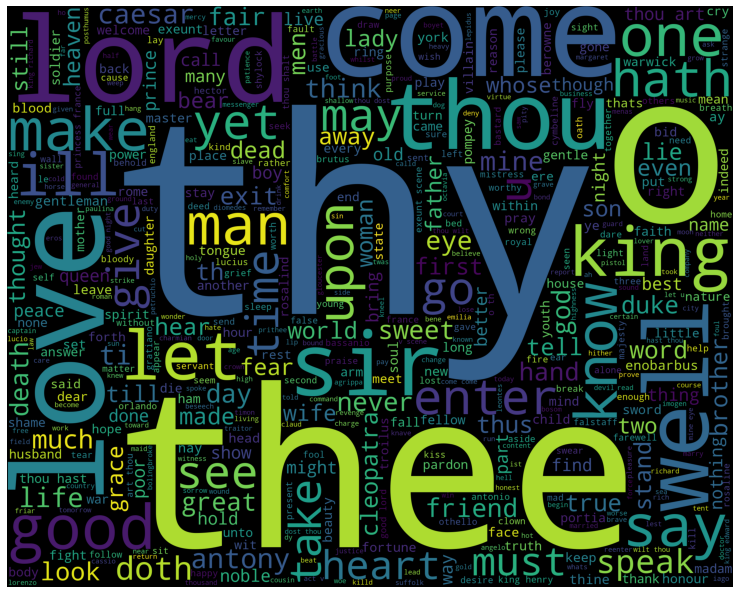

In [13]:
# each word is considered here as indivial element
WNL = nltk.WordNetLemmatizer()
text = ''.join([words for words in df_data['text']])
# Lowercase and tokenize
text = text.lower()
# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")
word_tokens = nltk.word_tokenize(text)
text1 = nltk.Text(word_tokens)

# Remove extra chars and remove stop words.
text_data = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

#set the stopwords list
stopwords_word_count = set(STOPWORDS)
text_data = [word for word in text_data if word not in stopwords_word_count]

text_data = [c for c in text_data if not c.isdigit()]
# Best to get the lemmas of each word to reduce the number of similar words
text_data = [WNL.lemmatize(t) for t in text_data]
corpus = ' '.join(text_data)

wordcloud = WordCloud().generate(corpus)

wordcloud = WordCloud(background_color='black',
                      max_words=500,
                      width=2500,
                      height=2000).generate(corpus)

plt.figure(1,figsize=(13, 18))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Average number of words per sentence per genre

In [14]:
final_wc_per_sent = []

final_wc_per_genre = {'COMEDIES' : [], 'HISTORIES' : [], 'TRAGEDIES' : [], 'POEMS' : []}

for name, group in df_data.groupby('genre'):
    
    for index, text in group.iterrows():
        word_count_per_text = sentence_word_count(text['text'], name)
        final_wc_per_sent = final_wc_per_sent + word_count_per_text
        final_wc_per_genre[name] = final_wc_per_genre[name] + word_count_per_text
    
    print("Average word count per sentence for genre " + name + "  : " + str(np.array(final_wc_per_genre[name]).mean()))
    
print("Average word count per sentence for all genres : " + str(np.array(final_wc_per_sent).mean()))

Average word count per sentence for genre COMEDIES  : 4.825337546681988
Average word count per sentence for genre HISTORIES  : 5.78746465598492
Average word count per sentence for genre POEMS  : 3.746492985971944
Average word count per sentence for genre TRAGEDIES  : 4.377756872582837
Average word count per sentence for all genres : 4.6810703917196115


## Part 2) 

In [15]:
#check if sentence is a question
def if_question(sentence):

    if sentence.endswith("?"):
        return True
    else:
        return False
    
def find_total_sentences(text, genre):
    text = text.lower()
    text = text.replace("'", "")
    total_questions = 0
    total_sentences = 0
    
    #Every new line is a sentence in a po
    if genre == "POEMS":
        tokens_sentence = text.strip().split("\n")
        tokens_sentence = [a.strip() for a in tokens_sentence if not a.isdigit()]
        for s in tokens_sentence:
            if if_question(s):
                total_questions+=1
            total_sentences+=1
         
    else:
        tokens_sentence = sent_tokenize(text)
        for s in tokens_sentence:
            if if_question(s):
                total_questions+=1
            total_sentences+=1

    return total_questions, total_sentences



In [16]:
total_questions, total_sentences_cnt = [], []

for index, text in df_data.iterrows():
    ques_cnt, total_cnt = find_total_sentences(text['text'], text['genre'])
    total_questions.append(ques_cnt)
    total_sentences_cnt.append(total_cnt)

df_data['total_questions'] = total_questions
df_data['total_sentences_cnt'] = total_sentences_cnt

print("Total Probability of Shakespeare asking a question : " + str( df_data['total_questions'].sum() / df_data['total_sentences_cnt'].sum() ))

Total Probability of Shakespeare asking a question : 0.0896621365759246


### Distribution of number of questions for all of Shakespeare's work

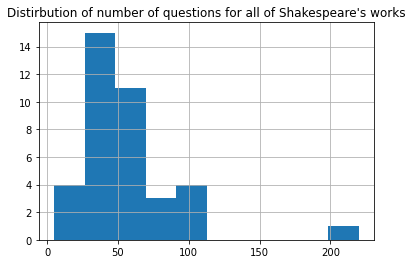

<Figure size 432x288 with 0 Axes>

In [17]:
df_data['total_questions'].hist()
plt.title("Distirbution of number of questions for all of Shakespeare's works") 
plt.show()
plt.clf()

### Distribution of number of questions per genre

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from distfit import distfit

def best_fit_probability_distribution(genre_name, df_input):
    
    group = df_input[df_input['genre'] == genre_name]
    group['total_questions'].hist()
    plt.title("Probability Distribution of Total Questions for genre : " + genre_name) 
    plt.show()
    plt.clf()
    print("Total Probability of asking questions for genre " + genre_name + " : " + str( group['total_questions'].sum() / group['total_sentences_cnt'].sum() ))
    dist = distfit(todf=True)
    results = dist.fit_transform(group['total_questions'])
    dist.plot()
    print(dist.model)
    plt.show()
    

### Probability distribution of total questions for every genre

### Probability distribution of total questions for COMEDIES

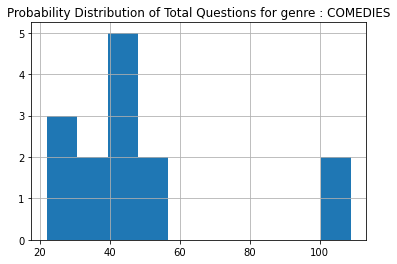

Total Probability of asking questions for genre COMEDIES : 0.09796035621947716
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0191741] [loc=48.714 scale=25.797]
[distfit] >[expon     ] [0.0 sec] [RSS: 0.0163355] [loc=22.000 scale=26.714]
[distfit] >[pareto    ] [0.06 sec] [RSS: 0.0178045] [loc=-0.061 scale=22.061]
[distfit] >[dweibull  ] [0.07 sec] [RSS: 0.0153206] [loc=44.000 scale=20.508]
[distfit] >[t         ] [0.14 sec] [RSS: 0.0139183] [loc=42.263 scale=7.955]
[distfit] >[genextreme] [0.22 sec] [RSS: 0.0170206] [loc=35.925 scale=13.825]
[distfit] >[gamma     ] [0.11 sec] [RSS: 0.0163642] [loc=22.000 scale=26.218]
[distfit] >[lognorm   ] [0.29 sec] [RSS: 0.0192193] [loc=22.000 scale=7.016]
[distfit] >[beta      ] [0.11 sec] [RSS: 0.0187246] [loc=16.943 scale=92.057]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0203569] [loc=22.000 scale=87.000]
[distfit] >[loggamma  ] [0.14 sec] [RSS: 0.0192451] [loc=-8141.729 scale=1095.228]
[distfit] >Compute co

<Figure size 432x288 with 0 Axes>

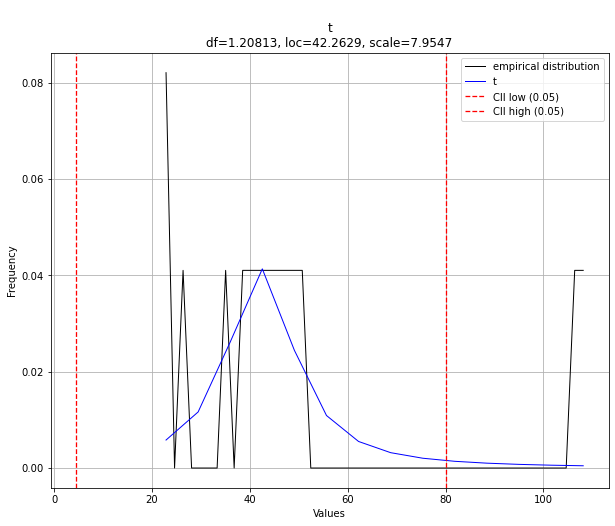

In [19]:
best_fit_probability_distribution('COMEDIES', df_data)

### For Comedy genre, T-distribution is the best fit distribution

### Probability distribution of total questions for HISTORIES

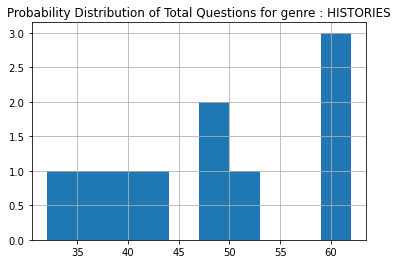

Total Probability of asking questions for genre HISTORIES : 0.11357210179076344
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.3462071] [loc=48.200 scale=10.206]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.3481208] [loc=32.000 scale=16.200]
[distfit] >[pareto    ] [0.08 sec] [RSS: 0.3544229] [loc=-0.092 scale=32.092]
[distfit] >[dweibull  ] [0.06 sec] [RSS: 0.3208126] [loc=48.000 scale=10.148]
[distfit] >[t         ] [0.16 sec] [RSS: 0.3462076] [loc=48.199 scale=10.206]
[distfit] >[genextreme] [0.40 sec] [RSS: 0.3575611] [loc=32.426 scale=2.740]
[distfit] >[gamma     ] [0.13 sec] [RSS: 0.3459783] [loc=-130.573 scale=0.579]
[distfit] >[lognorm   ] [0.27 sec] [RSS: 0.3573159] [loc=32.000 scale=3.116]
[distfit] >[beta      ] [0.22 sec] [RSS: 0.3287932] [loc=32.000 scale=30.186]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.3333333] [loc=32.000 scale=30.000]
[distfit] >[loggamma  ] [0.17 sec] [RSS: 0.3461491] [loc=-2440.969 scale=352.102]
[distfit] >Compute 

<Figure size 432x288 with 0 Axes>

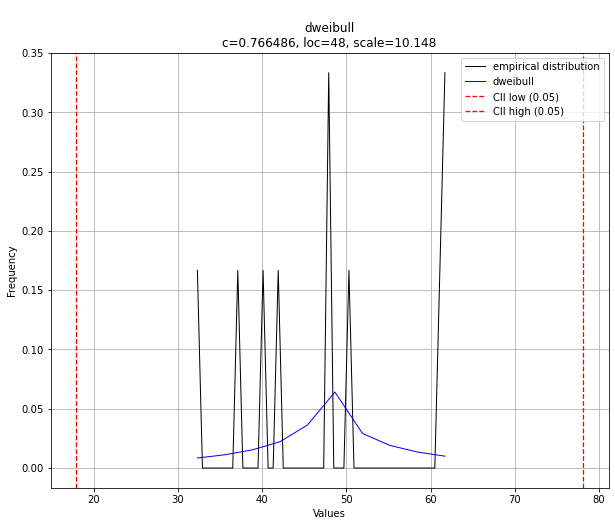

In [20]:
best_fit_probability_distribution('HISTORIES', df_data)

### For History genre, dweibull is the best fit distribution

### Probability distribution of total questions for POEMS

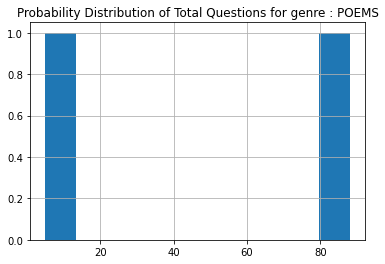

Total Probability of asking questions for genre POEMS : 0.031062124248496994
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.1777343] [loc=46.500 scale=41.500]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.1723391] [loc=5.000 scale=41.500]
[distfit] >[pareto    ] [0.05 sec] [RSS: 0.1396728] [loc=-0.005 scale=5.005]
[distfit] >[dweibull  ] [0.14 sec] [RSS: 0.1814487] [loc=46.500 scale=41.500]
[distfit] >[t         ] [0.11 sec] [RSS: 0.1813179] [loc=5.000 scale=0.000]
[distfit] >[genextreme] [0.39 sec] [RSS: 0.1393021] [loc=5.080 scale=0.389]
[distfit] >[gamma     ] [0.06 sec] [RSS: 0.1777343] [loc=-829966.077 scale=0.002]
[distfit] >[lognorm   ] [0.29 sec] [RSS: 0.1422128] [loc=5.000 scale=1.845]
[distfit] >[beta      ] [0.13 sec] [RSS: 0.1617388] [loc=-26.780 scale=114.780]
[distfit] >[uniform   ] [0.01 sec] [RSS: 0.1741907] [loc=5.000 scale=83.000]
[distfit] >[loggamma  ] [0.08 sec] [RSS: 0.1723366] [loc=88.000 scale=0.000]
[distfit] >Compute confidence

<Figure size 432x288 with 0 Axes>

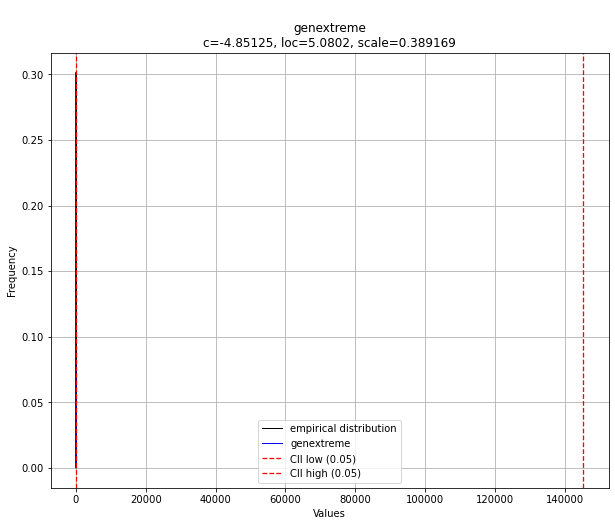

In [22]:
best_fit_probability_distribution('POEMS', df_data)

### For Poems genre, Genextreme model is the best fit distribution

### Probability distribution of total questions for TRAGEDIES

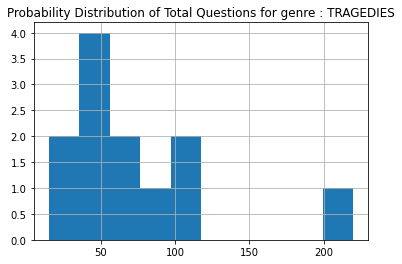

Total Probability of asking questions for genre TRAGEDIES : 0.09135570189192015
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0040911] [loc=72.833 scale=51.673]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.0039205] [loc=15.000 scale=57.833]
[distfit] >[pareto    ] [0.06 sec] [RSS: 0.0053627] [loc=-0.036 scale=15.036]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 0.0038510] [loc=60.292 scale=36.116]
[distfit] >[t         ] [0.14 sec] [RSS: 0.0038040] [loc=57.791 scale=26.304]
[distfit] >[genextreme] [0.31 sec] [RSS: 0.0036606] [loc=48.085 scale=28.597]
[distfit] >[gamma     ] [0.07 sec] [RSS: 0.0048092] [loc=15.000 scale=75.980]
[distfit] >[lognorm   ] [0.36 sec] [RSS: 0.0049857] [loc=15.000 scale=4.839]
[distfit] >[beta      ] [0.13 sec] [RSS: 0.0045594] [loc=-6.762 scale=226.762]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.0045938] [loc=15.000 scale=205.000]
[distfit] >[loggamma  ] [0.13 sec] [RSS: 0.0041104] [loc=-18542.648 scale=2441.027]
[distfit] >Comp

<Figure size 432x288 with 0 Axes>

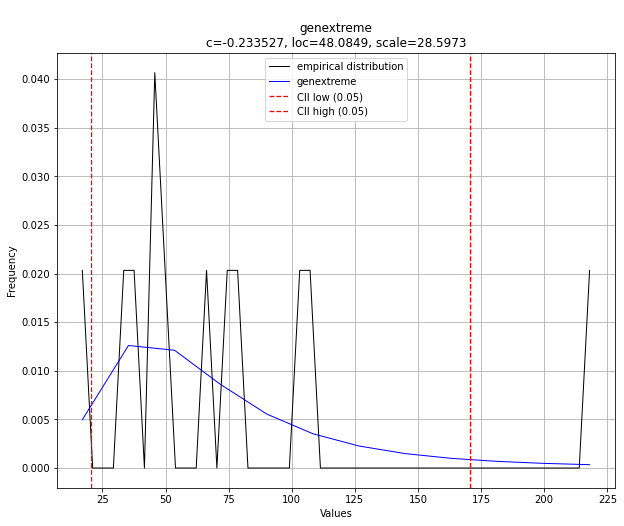

In [23]:
best_fit_probability_distribution('TRAGEDIES', df_data)

### For TRAGEDIES genre, Genextreme model is the best fit distribution

### In order to find the best distribution fit for every genre, 'distfit' package is being used as it tries to fit data across 89 different distributions and find the best probability distribution.

## PART 3) 

## Sentiment Analysis

In [24]:
import pandas as pd
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from tqdm import tqdm
import text2emotion as te
import multiprocess as mp
import text2emotion as te
from time import time
from pandarallel import pandarallel


In [25]:
pandarallel.initialize()

df_genre = {'COMEDIES' : '' , 'HISTORIES' : '', 'POEMS' : '', 'TRAGEDIES' : ''}

def emotion_dict(text, func=te.get_emotion):
    emotion_dict = func(text)
    return emotion_dict
    print(emotion_dict)

final_data = []

for name, group in df_data.groupby('genre'):
    text = ''.join([words for words in group['text'].values.tolist()])
    final_data.append({'genre' : name, 'text' : text})

df = pd.DataFrame(final_data)
print(df)
df['emotion'] = df['text'].parallel_apply(emotion_dict)


INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/
       genre                                               text
0   COMEDIES  \n\n\n\n\nACT V. SCENE 1.\nMarseilles. A stree...
1  HISTORIES  \n\n\n\nACT V. Scene I.\nThe King's camp near ...
2      POEMS  \n\n\n\n                     1\n  From fairest...
3  TRAGEDIES  \n\n\n\n\nACT II. SCENE I.\nMessina. POMPEY'S ...


In [26]:
df

,genre,text,emotion
0,COMEDIES,\n\n\n\n\nACT V. SCENE 1.\nMarseilles. A stree...,"{'Happy': 0.14, 'Angry': 0.08, 'Surprise': 0.2..."
1,HISTORIES,\n\n\n\nACT V. Scene I.\nThe King's camp near ...,"{'Happy': 0.14, 'Angry': 0.08, 'Surprise': 0.1..."
2,POEMS,\n\n\n\n 1\n From fairest...,"{'Happy': 0.19, 'Angry': 0.08, 'Surprise': 0.1..."
3,TRAGEDIES,\n\n\n\n\nACT II. SCENE I.\nMessina. POMPEY'S ...,"{'Happy': 0.13, 'Angry': 0.08, 'Surprise': 0.2..."


In [27]:
df.columns

Index(['genre', 'text', 'emotion'], dtype='object')

In [28]:
from distfit import distfit

def sentiment_analysis_distribution(genre_name, df):

    key = genre_name
    emotion_dict = df[df['genre'] == genre_name]['emotion'].values.tolist()[0]
    print("List of Emotions: ", emotion_dict )
    emotions = emotion_dict.keys()    
    dist = distfit(todf=True)
    print(emotion_dict.values())
    results = dist.fit_transform(np.array(list(emotion_dict.values())))
    dist.plot()
    plt.title("Sentiment Analysis for genre : " + genre_name)
    plt.show()
    plt.clf()
    dist.plot_summary()
    print(dist.model)


List of Emotions:  {'Happy': 0.14, 'Angry': 0.08, 'Surprise': 0.21, 'Sad': 0.26, 'Fear': 0.31}
dict_values([0.14, 0.08, 0.21, 0.26, 0.31])
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 8765.2436286] [loc=0.200 scale=0.082]
[distfit] >[expon     ] [0.00 sec] [RSS: 8683.9102089] [loc=0.080 scale=0.120]
[distfit] >[pareto    ] [0.03 sec] [RSS: 8676.6990427] [loc=-0.105 scale=0.185]
[distfit] >[dweibull  ] [0.07 sec] [RSS: 8600.9099892] [loc=0.210 scale=0.083]
[distfit] >[t         ] [0.18 sec] [RSS: 8765.2256313] [loc=0.200 scale=0.082]
[distfit] >[genextreme] [0.28 sec] [RSS: 8321.8607874] [loc=0.217 scale=0.112]
[distfit] >[gamma     ] [0.16 sec] [RSS: 8767.3007578] [loc=-1.719 scale=0.004]
[distfit] >[lognorm   ] [0.30 sec] [RSS: 8766.2508497] [loc=-8.051 scale=8.251]
[distfit] >[beta      ] [0.13 sec] [RSS: 8106.0039943] [loc=0.062 scale=0.248]
[distfit] >[uniform   ] [0.00 sec] [RSS: 8506.6162571] [loc=0.080 scale=0.230]
[distfit] >[loggamma  ] [0.0

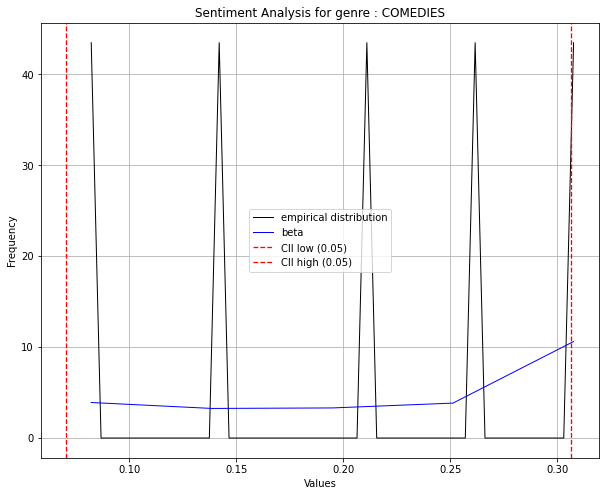

[distfit] >plot summary..
{'distr': <scipy.stats._continuous_distns.beta_gen object at 0x000001B1BB0983A0>, 'stats': 'RSS', 'params': (0.7914098745074685, 0.669414317085145, 0.061986727429923366, 0.24801327257007666), 'name': 'beta', 'model': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B1C6C1C130>, 'score': 8106.003994347892, 'loc': 0.061986727429923366, 'scale': 0.24801327257007666, 'arg': (0.7914098745074685, 0.669414317085145), 'CII_min_alpha': 0.07066436763085537, 'CII_max_alpha': 0.3063104175546831}


<Figure size 432x288 with 0 Axes>

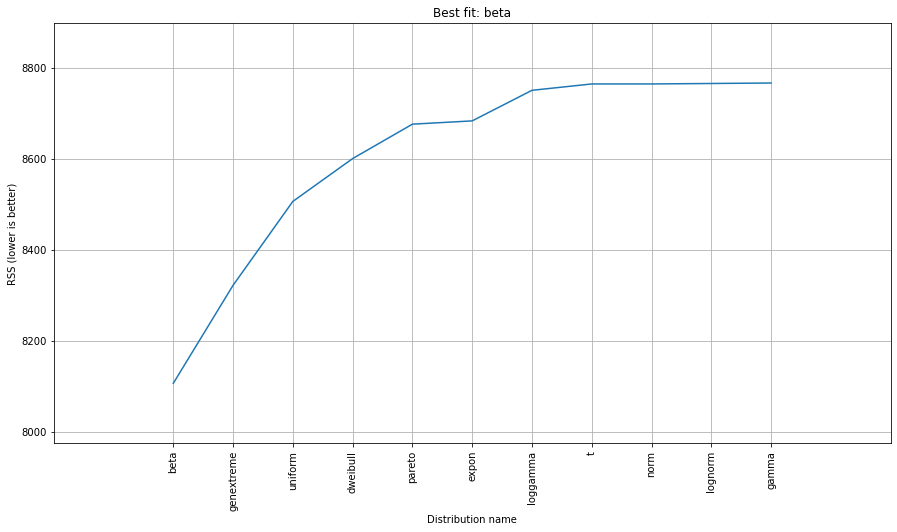

In [29]:
sentiment_analysis_distribution('COMEDIES', df)

### For COMEDIES genre, Beta distribution is the best fit distribution with parameters α = 0.7914098745074685, β=0.669414317085145

List of Emotions:  {'Happy': 0.14, 'Angry': 0.08, 'Surprise': 0.19, 'Sad': 0.28, 'Fear': 0.31}
dict_values([0.14, 0.08, 0.19, 0.28, 0.31])
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 8800.2828807] [loc=0.200 scale=0.086]
[distfit] >[expon     ] [0.00 sec] [RSS: 8655.2284495] [loc=0.080 scale=0.120]
[distfit] >[pareto    ] [0.04 sec] [RSS: 8647.1004296] [loc=-0.103 scale=0.183]
[distfit] >[dweibull  ] [0.06 sec] [RSS: 8451.4359278] [loc=0.220 scale=0.091]
[distfit] >[t         ] [0.19 sec] [RSS: 8800.2705541] [loc=0.200 scale=0.086]
[distfit] >[genextreme] [0.30 sec] [RSS: 8172.6968259] [loc=0.215 scale=0.119]
[distfit] >[gamma     ] [0.17 sec] [RSS: 8799.8013333] [loc=-5.478 scale=0.001]
[distfit] >[lognorm   ] [0.33 sec] [RSS: 8798.9007561] [loc=-3.867 scale=4.066]
[distfit] >[beta      ] [0.13 sec] [RSS: 7588.9567676] [loc=0.078 scale=0.232]
[distfit] >[uniform   ] [0.0 sec] [RSS: 8506.6162571] [loc=0.080 scale=0.230]
[distfit] >[loggamma  ] [0.11

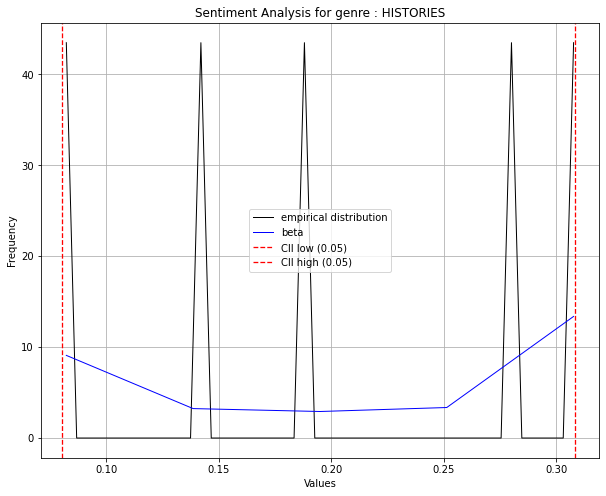

[distfit] >plot summary..
{'distr': <scipy.stats._continuous_distns.beta_gen object at 0x000001B1BB0983A0>, 'stats': 'RSS', 'params': (0.559337560819303, 0.5348659323723264, 0.07798234328874142, 0.2320176567112586), 'name': 'beta', 'model': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B1C6C22CD0>, 'score': 7588.956767594984, 'loc': 0.07798234328874142, 'scale': 0.2320176567112586, 'arg': (0.559337560819303, 0.5348659323723264), 'CII_min_alpha': 0.08036803205199496, 'CII_max_alpha': 0.30821854635586515}


<Figure size 432x288 with 0 Axes>

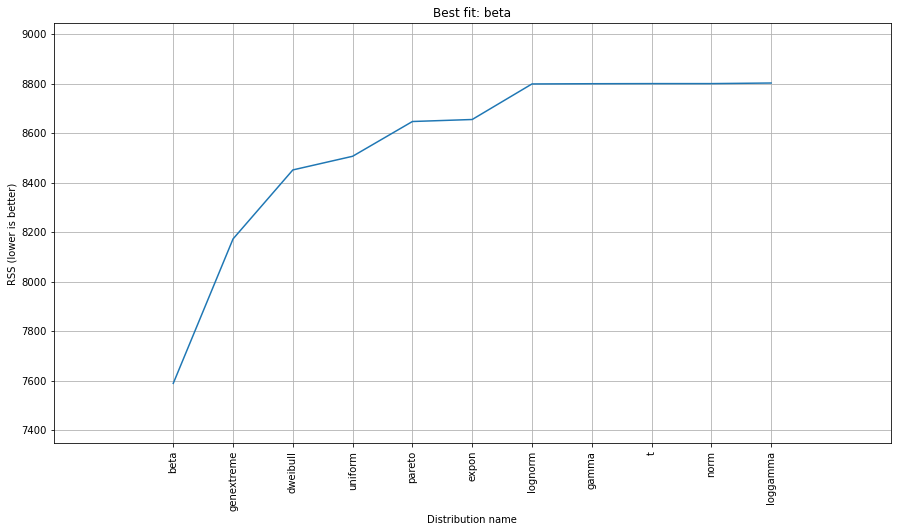

In [30]:
sentiment_analysis_distribution('HISTORIES', df)

### For Histories genre, Beta model is the best fit distribution with parameters α = 0.559337560819303, β=0.5348659323723264

List of Emotions:  {'Happy': 0.19, 'Angry': 0.08, 'Surprise': 0.17, 'Sad': 0.29, 'Fear': 0.27}
dict_values([0.19, 0.08, 0.17, 0.29, 0.27])
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 10483.6251005] [loc=0.200 scale=0.075]
[distfit] >[expon     ] [0.0 sec] [RSS: 10530.2231965] [loc=0.080 scale=0.120]
[distfit] >[pareto    ] [0.03 sec] [RSS: 10541.5253091] [loc=-0.110 scale=0.190]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 10129.3908278] [loc=0.218 scale=0.077]
[distfit] >[t         ] [0.17 sec] [RSS: 10483.6395701] [loc=0.200 scale=0.075]
[distfit] >[genextreme] [0.41 sec] [RSS: 9596.0063763] [loc=0.215 scale=0.091]
[distfit] >[gamma     ] [0.15 sec] [RSS: 10489.8247193] [loc=-1.065 scale=0.005]
[distfit] >[lognorm   ] [0.28 sec] [RSS: 10483.8664827] [loc=-16.016 scale=16.216]
[distfit] >[beta      ] [0.14 sec] [RSS: 9719.0725317] [loc=0.053 scale=0.237]
[distfit] >[uniform   ] [0.00 sec] [RSS: 10204.0816327] [loc=0.080 scale=0.210]
[distfit] >[loggamm

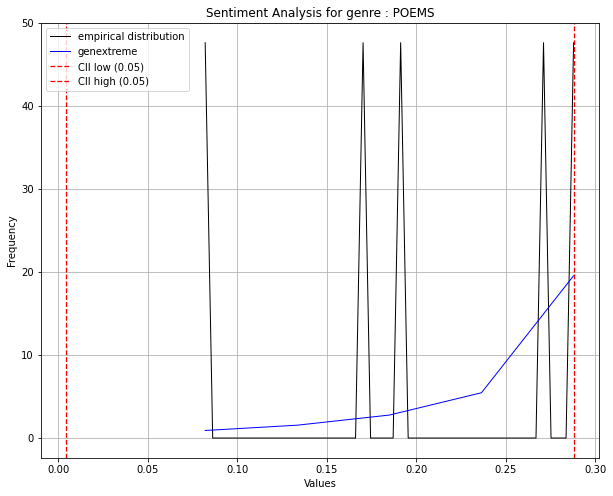

[distfit] >plot summary..
{'distr': <scipy.stats._continuous_distns.genextreme_gen object at 0x000001B1BB1074F0>, 'stats': 'RSS', 'params': (1.2151181510296905, 0.21474232352409975, 0.09144696869018652), 'name': 'genextreme', 'model': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B1C8489B50>, 'score': 9596.006376308473, 'loc': 0.21474232352409975, 'scale': 0.09144696869018652, 'arg': (1.2151181510296905,), 'CII_min_alpha': 0.004531464015688935, 'CII_max_alpha': 0.2879623855177098}


<Figure size 432x288 with 0 Axes>

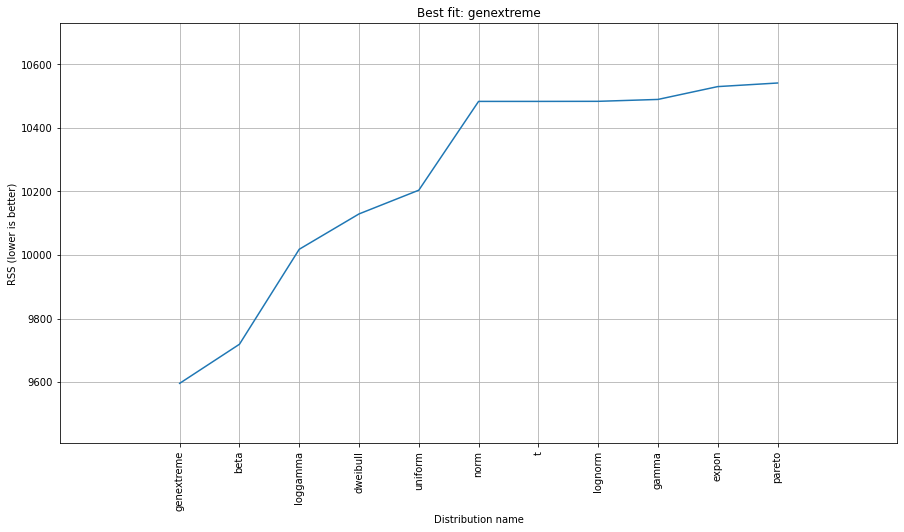

In [31]:
sentiment_analysis_distribution('POEMS', df)

### For Poems genre, Genextreme model is the best fit distribution with parameter C = 1.2151181510296905

List of Emotions:  {'Happy': 0.13, 'Angry': 0.08, 'Surprise': 0.21, 'Sad': 0.27, 'Fear': 0.31}
dict_values([0.13, 0.08, 0.21, 0.27, 0.31])
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 8812.2869632] [loc=0.200 scale=0.085]
[distfit] >[expon     ] [0.00 sec] [RSS: 8643.0392379] [loc=0.080 scale=0.120]
[distfit] >[pareto    ] [0.04 sec] [RSS: 8613.7352610] [loc=-0.102 scale=0.182]
[distfit] >[dweibull  ] [0.05 sec] [RSS: 8583.8886907] [loc=0.181 scale=0.090]
[distfit] >[t         ] [0.20 sec] [RSS: 8812.2738859] [loc=0.200 scale=0.085]
[distfit] >[genextreme] [0.30 sec] [RSS: 8378.9084234] [loc=0.186 scale=0.139]
[distfit] >[gamma     ] [0.13 sec] [RSS: 8813.5269065] [loc=-1.785 scale=0.004]
[distfit] >[lognorm   ] [0.28 sec] [RSS: 8816.0363029] [loc=-6.328 scale=6.528]
[distfit] >[beta      ] [0.14 sec] [RSS: 7694.1022501] [loc=0.071 scale=0.239]
[distfit] >[uniform   ] [0.0 sec] [RSS: 8506.6162571] [loc=0.080 scale=0.230]
[distfit] >[loggamma  ] [0.04

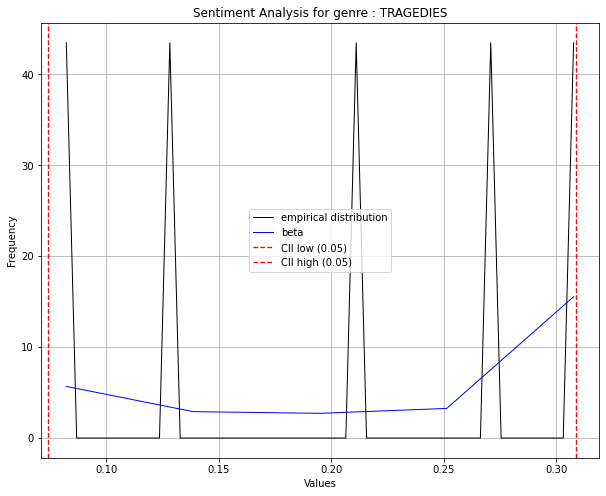

[distfit] >plot summary..
{'distr': <scipy.stats._continuous_distns.beta_gen object at 0x000001B1BB0983A0>, 'stats': 'RSS', 'params': (0.5504687070083972, 0.479658786500635, 0.0714275022742302, 0.23857249772576983), 'name': 'beta', 'model': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B1C75BC6A0>, 'score': 7694.102250077931, 'loc': 0.0714275022742302, 'scale': 0.23857249772576983, 'arg': (0.5504687070083972, 0.479658786500635), 'CII_min_alpha': 0.0740375948874791, 'CII_max_alpha': 0.30899127309362223}


<Figure size 432x288 with 0 Axes>

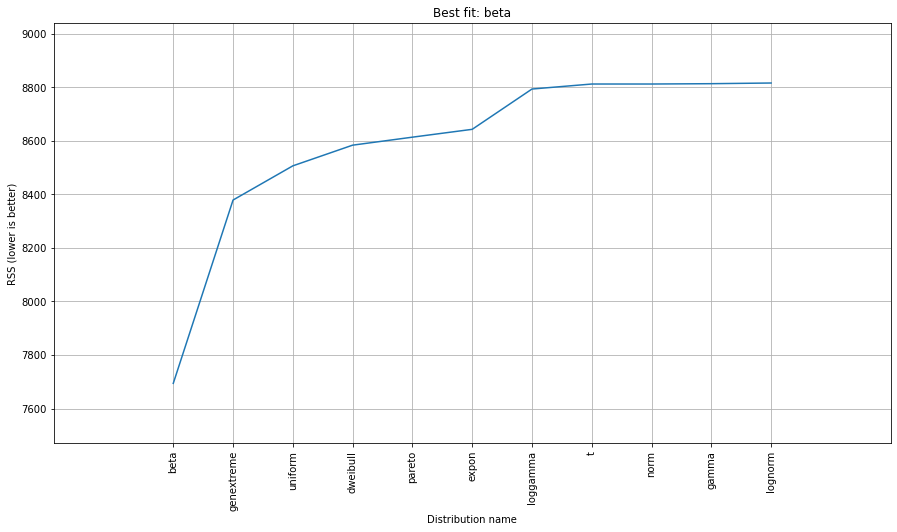

In [32]:
sentiment_analysis_distribution('TRAGEDIES', df)

### For Tragedies genre, Beta model is the best fit distribution with parameters α = 0.5504687070083972, β=0.479658786500635

### Hence, it can be concluded that for the three genres Histories, Tragedies and Comedies distribution is the same: Beta distribution. However, distribution for Poems is different: Genextreme distribution.

## PART 4) 



## Time series analysis

In [33]:
df_genre = {'POEMS' : '' , 'HISTORIES' : '', 'TRAGEDIES' : '', 'COMEDIES' : ''}

def emotion_dict(text, func=te.get_emotion):
    emotion_dict = func(text)
    return emotion_dict

final_data = []

for name, group in df_data.groupby('genre'):
    for year, year_group in group.groupby('year'):
        text = ''.join([words for words in year_group['text'].values.tolist()])
        final_data.append({'genre' : name, 'year' : year, 'text' : text})

df_year = pd.DataFrame(final_data)

df_year['emotion'] = df_year['text'].parallel_apply(emotion_dict)

df_year['emotion']

0     {'Happy': 0.1, 'Angry': 0.1, 'Surprise': 0.19,...
1     {'Happy': 0.14, 'Angry': 0.1, 'Surprise': 0.18...
2     {'Happy': 0.16, 'Angry': 0.08, 'Surprise': 0.2...
3     {'Happy': 0.14, 'Angry': 0.14, 'Surprise': 0.2...
4     {'Happy': 0.14, 'Angry': 0.08, 'Surprise': 0.1...
5     {'Happy': 0.13, 'Angry': 0.07, 'Surprise': 0.2...
6     {'Happy': 0.13, 'Angry': 0.09, 'Surprise': 0.2...
7     {'Happy': 0.16, 'Angry': 0.05, 'Surprise': 0.1...
8     {'Happy': 0.15, 'Angry': 0.1, 'Surprise': 0.18...
9     {'Happy': 0.09, 'Angry': 0.08, 'Surprise': 0.2...
10    {'Happy': 0.12, 'Angry': 0.08, 'Surprise': 0.2...
11    {'Happy': 0.14, 'Angry': 0.06, 'Surprise': 0.2...
12    {'Happy': 0.11, 'Angry': 0.12, 'Surprise': 0.1...
13    {'Happy': 0.14, 'Angry': 0.07, 'Surprise': 0.1...
14    {'Happy': 0.16, 'Angry': 0.04, 'Surprise': 0.2...
15    {'Happy': 0.11, 'Angry': 0.08, 'Surprise': 0.2...
16    {'Happy': 0.11, 'Angry': 0.08, 'Surprise': 0.1...
17    {'Happy': 0.13, 'Angry': 0.08, 'Surprise':

In [34]:
df_year

,genre,year,text,emotion
0,COMEDIES,1593,\n\n\n\n\n\nACT V. SCENE 1\n\nA street before ...,"{'Happy': 0.1, 'Angry': 0.1, 'Surprise': 0.19,..."
1,COMEDIES,1594,\n\n\n\nACT V. SCENE I.\nPadua. Before LUCENTI...,"{'Happy': 0.14, 'Angry': 0.1, 'Surprise': 0.18..."
2,COMEDIES,1595,\n\n\n\nACT V. SCENE I.\nThe park\n\nEnter HOL...,"{'Happy': 0.16, 'Angry': 0.08, 'Surprise': 0.2..."
3,COMEDIES,1596,\n\n\n\nACT V. SCENE I.\nAthens. The palace of...,"{'Happy': 0.14, 'Angry': 0.14, 'Surprise': 0.2..."
4,COMEDIES,1597,\n\n\n\nACT III. SCENE I.\nVenice. A street\n\...,"{'Happy': 0.14, 'Angry': 0.08, 'Surprise': 0.1..."
5,COMEDIES,1599,"\n\n\n\nACT V. Scene I.\nThe street, near Leon...","{'Happy': 0.13, 'Angry': 0.07, 'Surprise': 0.2..."
6,COMEDIES,1601,\n\n\n\nACT IV. SCENE I.\nThe forest\n\nEnter ...,"{'Happy': 0.13, 'Angry': 0.09, 'Surprise': 0.2..."
7,COMEDIES,1602,\n\n\n\nACT V. SCENE I.\nBefore OLIVIA's house...,"{'Happy': 0.16, 'Angry': 0.05, 'Surprise': 0.1..."
8,COMEDIES,1603,\n\n\n\n\nACT V. SCENE 1.\nMarseilles. A stree...,"{'Happy': 0.15, 'Angry': 0.1, 'Surprise': 0.18..."
9,COMEDIES,1605,\n\n\n\nACT V. SCENE I.\nThe city gate\n\nEnte...,"{'Happy': 0.09, 'Angry': 0.08, 'Surprise': 0.2..."


In [35]:
df_final_data = df_year.emotion.apply(pd.Series)
df_final_data['year'] = df_year['year']
df_final_data['genre'] = df_year['genre']
df_final_data

,Happy,Angry,Surprise,Sad,Fear,year,genre
0,0.10,0.10,0.19,0.31,0.30,1593,COMEDIES
1,0.14,0.10,0.18,0.24,0.33,1594,COMEDIES
2,0.16,0.08,0.20,0.27,0.29,1595,COMEDIES
3,0.14,0.14,0.20,0.24,0.27,1596,COMEDIES
4,0.14,0.08,0.18,0.26,0.34,1597,COMEDIES
5,0.13,0.07,0.27,0.25,0.28,1599,COMEDIES
6,0.13,0.09,0.25,0.25,0.28,1601,COMEDIES
7,0.16,0.05,0.19,0.29,0.31,1602,COMEDIES
8,0.15,0.10,0.18,0.25,0.32,1603,COMEDIES
9,0.09,0.08,0.22,0.27,0.34,1605,COMEDIES


In [36]:
emotions=['Happy', 'Angry', 'Sad', 'Fear', 'Surprise']
emotions

['Happy', 'Angry', 'Sad', 'Fear', 'Surprise']

In [71]:
def emotions_plot(genre_name, df):
    group = df[df['genre'] == genre_name]
    labels = group['year'].values.tolist()
    min_year, max_year = min(labels), max(labels)

    fig = plt.figure(figsize=(13, 8))
    ax = fig.add_subplot(1, 1, 1)

    for emotion in emotions:
        y = group[emotion].values.tolist()
        plt.plot_date(group['year'].values.tolist(), y, linewidth=3, label=emotion, linestyle = 'solid')

    plt.legend()
    plt.title("Sentiment Analysis for genre : " + genre_name)
    plt.show()
    plt.clf() 

### Rolling Mean Smoothing has been applied as it can be applied on distributions even smaller than 10, overcoming the constraint of Exponential Smoothing

In [74]:
def rolling_mean_smoothing_emotions(genre_name, df, window=2):
    group = df[df['genre'] == genre_name]
    labels = group['year'].values.tolist()
    min_year, max_year = min(labels), max(labels)

    fig = plt.figure(figsize=(13, 8))
    ax = fig.add_subplot(1, 1, 1)

    for emotion in emotions:
        group_new = group[emotion].rolling(window).mean()
        y = group_new
        plt.plot_date(group['year'].values.tolist(), y, linewidth=2, label=emotion, linestyle = 'solid')
        
    plt.title("Rolling Mean Smoothing Sentiment Analysis for genre : " + genre_name)
    plt.legend()
    plt.show()
    plt.clf() 

## Genre: COMEDIES

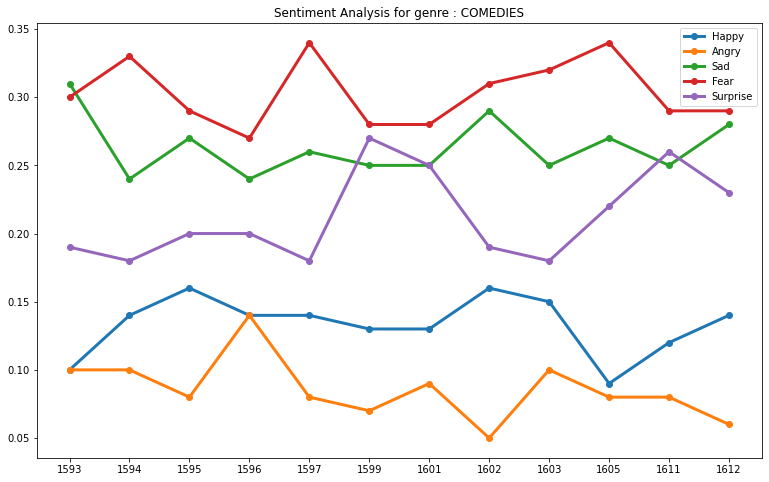

<Figure size 432x288 with 0 Axes>

In [75]:
emotions_plot('COMEDIES', df_final_data)

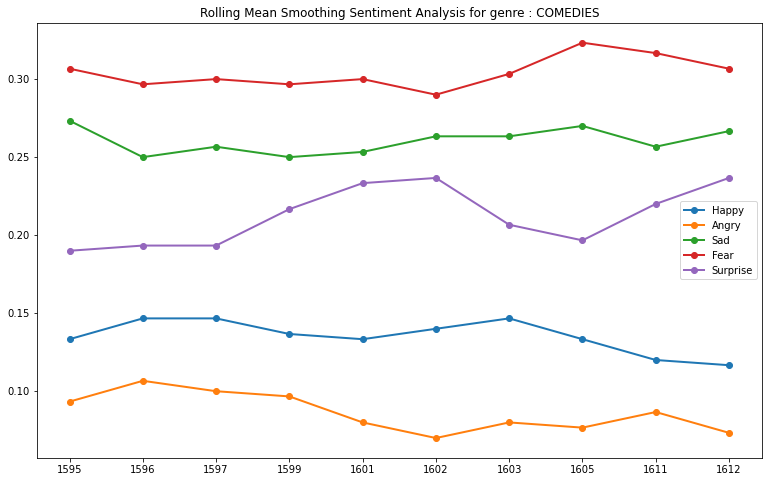

<Figure size 432x288 with 0 Axes>

In [76]:
rolling_mean_smoothing_emotions('COMEDIES', df_final_data, 3)

## Genre: HISTORIES

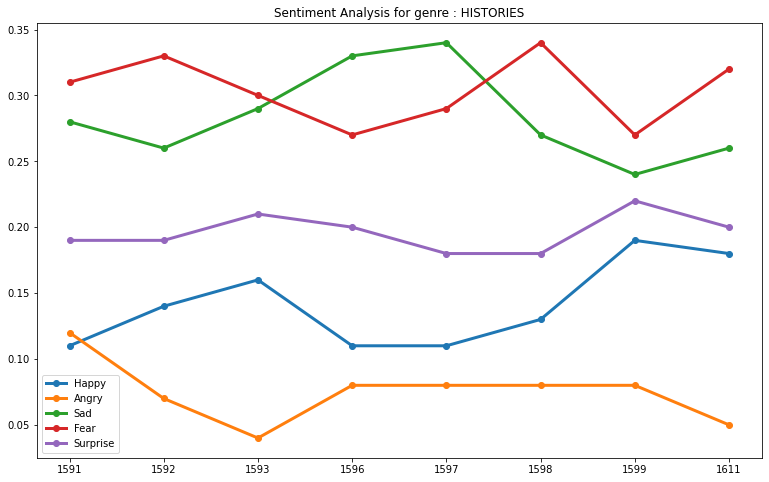

<Figure size 432x288 with 0 Axes>

In [77]:
emotions_plot('HISTORIES', df_final_data)

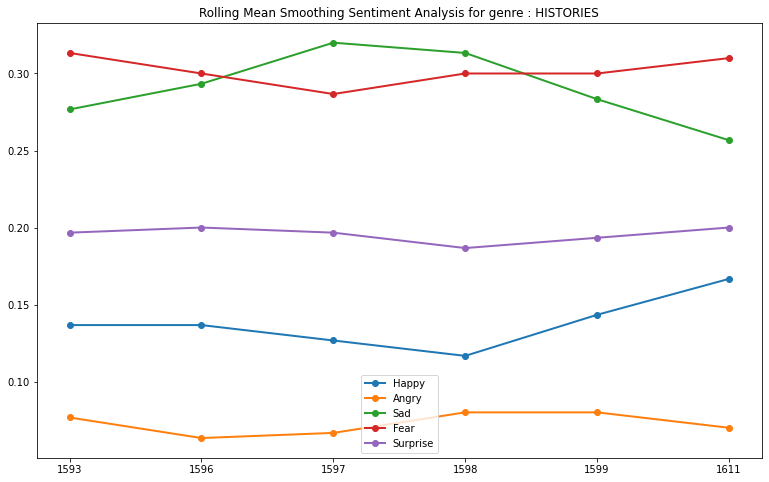

<Figure size 432x288 with 0 Axes>

In [78]:
rolling_mean_smoothing_emotions('HISTORIES', df_final_data, 3)

## Genre: POEMS

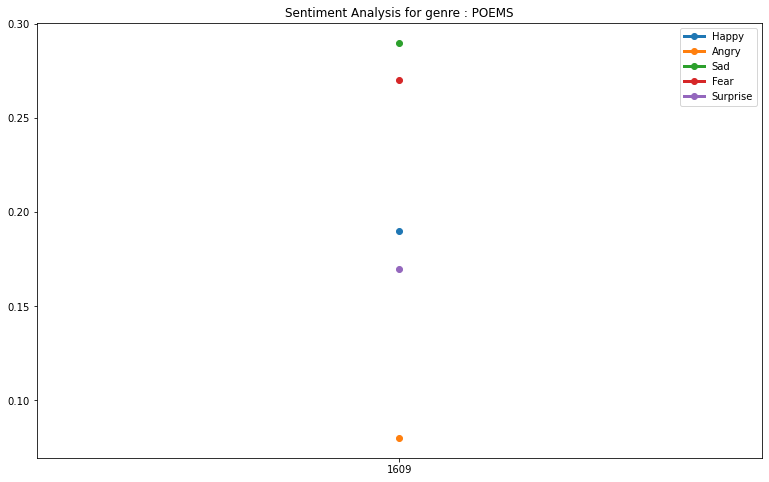

<Figure size 432x288 with 0 Axes>

In [79]:
emotions_plot('POEMS', df_final_data)

## No smoothing is being done for Poems genre as it contains text only for one year 1609.

## Genre: TRAGEDIES

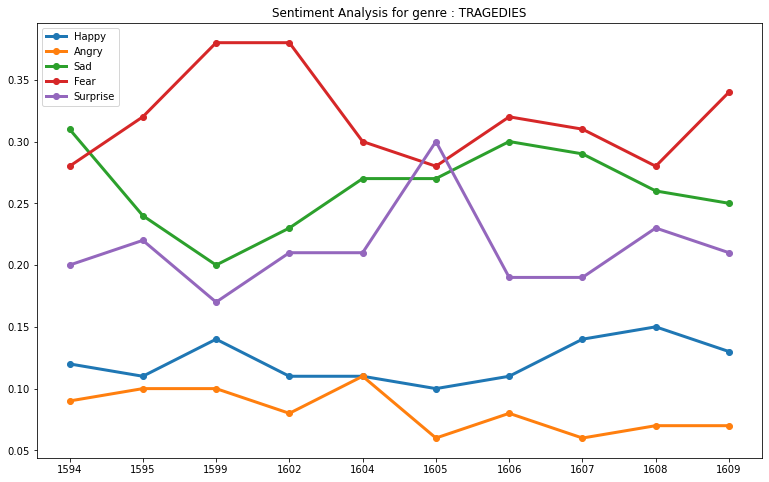

<Figure size 432x288 with 0 Axes>

In [80]:
emotions_plot('TRAGEDIES', df_final_data)

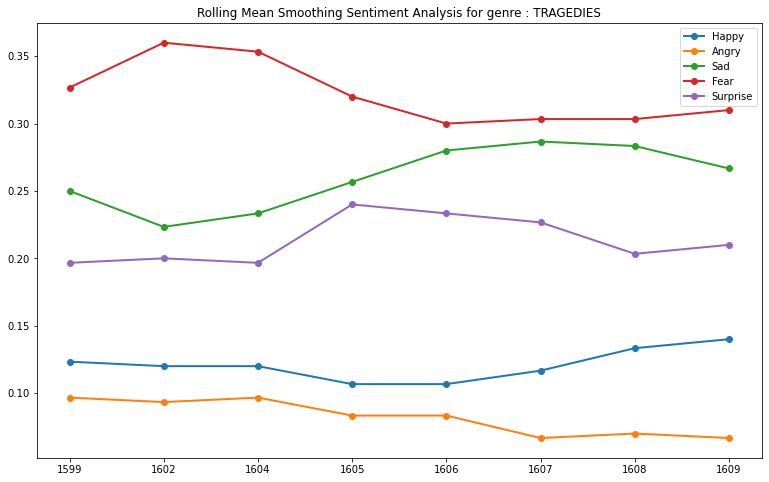

<Figure size 432x288 with 0 Axes>

In [81]:
rolling_mean_smoothing_emotions('TRAGEDIES', df_final_data, 3)

#### Sentiment of Fear is dominant in Comedy, History and Tragedy genre while in Poems genre Sad sentiment is dominant. Interestingly, sentiment of happiness is also maximum in the Poems genre among all the genres. Sentiment of Anger is exactly the same for all the genres and is a low value. This shows that Shakespeare didn't exhibit anger in his works produced. Sentiment of Surprise is maximum in both Comedies and Tragedies genre. 

#### In Comedy genre, Sadness remained almost the same, while Happiness increased over the passing years. Anger also decreased over time. 

#### In History genre, Happiness increased over time and Sadness decreased. Surpise remained almost the same. 

####  In Tragedy genre, Happiness remained almost the same over time, element of Suprise decreased and Sadness increased with the passing years. 

#### My favorite work is History as his plays are very appealing and captivating. Not only do they give insight into the political processes of medieval and renaissance politics but they also offer a glimpse of life from the top to the very bottom of society – the royal court, the nobility, tavern life, brothels, beggars, everything. T
